<a href="https://colab.research.google.com/github/nickmirunsw/py-learning/blob/main/tensorflow/tfnm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CHATGPT CHEATSHEET FOR TENSORFLOW***



In [102]:
# chatgpt cheatsheet and example

# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt

# # 1. Core TensorFlow Operations
# print("\n### Core TensorFlow Operations ###")
# constant_tensor = tf.constant([1, 2, 3], dtype=tf.float32, name="my_constant")
# variable_tensor = tf.Variable(initial_value=[4, 5, 6], trainable=True, dtype=tf.float32, name="my_variable")

# print("Constant:", constant_tensor.numpy())
# print("Variable:", variable_tensor.numpy())

# # 2. Keras Model Building
# print("\n### Keras Model Building ###")
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(units=128, activation='relu', input_shape=(64,), name="dense_1"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_1"),
#     tf.keras.layers.Dropout(rate=0.2, name="dropout_1"),
#     tf.keras.layers.Dense(units=64, activation='relu', name="dense_2"),
#     tf.keras.layers.BatchNormalization(name="batch_norm_2"),
#     tf.keras.layers.Dense(units=10, activation='softmax', name="output")
# ], name="sequential_model")

# model.summary()

# # 3. Model Compilation
# print("\n### Model Compilation ###")
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss=tf.keras.losses.CategoricalCrossentropy(),
#     metrics=['accuracy']
# )

# # 4. Data Preprocessing
# print("\n### Data Preprocessing ###")
# x_train = np.random.rand(1000, 64)  # Dummy training data (1000 samples, 64 features)
# y_train = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(1000,)), num_classes=10)

# x_val = np.random.rand(200, 64)  # Validation data
# y_val = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(200,)), num_classes=10)

# # Normalize data (common preprocessing step)
# x_train = (x_train - np.mean(x_train)) / np.std(x_train)
# x_val = (x_val - np.mean(x_val)) / np.std(x_val)

# # 5. Model Training with Callbacks
# print("\n### Model Training ###")
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', patience=3, restore_best_weights=True, verbose=1
# )
# history = model.fit(
#     x=x_train,
#     y=y_train,
#     validation_data=(x_val, y_val),
#     epochs=20,
#     batch_size=32,
#     callbacks=[early_stopping],
#     verbose=1
# )

# # 6. Visualizing Training History
# print("\n### Visualizing Training History ###")
# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Loss Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# plt.subplot(1, 2, 2)
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Accuracy Over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# # 7. Model Evaluation
# print("\n### Model Evaluation ###")
# loss, accuracy = model.evaluate(x_val, y_val, verbose=1)
# print(f"Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}")

# # 8. Model Prediction
# print("\n### Model Prediction ###")
# predictions = model.predict(x_val[:5])
# print("Predictions (softmax probabilities):", predictions)

# # 9. Transfer Learning with Pretrained Models
# print("\n### Transfer Learning ###")
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=(128, 128, 3),
#     include_top=False,
#     weights='imagenet'
# )
# base_model.trainable = False

# transfer_model = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(128, 128, 3)),
#     base_model,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

# transfer_model.compile(
#     optimizer=tf.keras.optimizers.Adam(),
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )
# transfer_model.summary()

# # Dummy image data
# x_train_images = np.random.rand(100, 128, 128, 3)  # 100 RGB images of size 128x128
# y_train_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(100,)), num_classes=10)

# x_val_images = np.random.rand(20, 128, 128, 3)
# y_val_images = tf.keras.utils.to_categorical(np.random.randint(0, 10, size=(20,)), num_classes=10)

# # Train transfer learning model
# transfer_model.fit(
#     x=x_train_images,
#     y=y_train_images,
#     validation_data=(x_val_images, y_val_images),
#     epochs=5,
#     batch_size=16
# )

# # 10. Model Saving and Loading
# print("\n### Model Saving and Loading ###")
# model.save("my_model.h5")
# loaded_model = tf.keras.models.load_model("my_model.h5")
# print("Model loaded successfully!")

# # 11. TensorFlow Dataset API
# print("\n### TensorFlow Dataset API ###")
# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# dataset = dataset.shuffle(buffer_size=100).batch(32).prefetch(tf.data.AUTOTUNE)

# for batch in dataset.take(1):
#     print("A batch of data:", batch)

# # 12. Advanced TensorFlow Features: Gradient Tape
# print("\n### Gradient Tape ###")
# x = tf.constant(3.0)
# y = tf.constant(4.0)

# with tf.GradientTape() as tape:
#     tape.watch(x)
#     z = x ** 2 + y ** 2
# gradients = tape.gradient(z, x)
# print("Gradient of z with respect to x:", gradients.numpy())


***TUTORIAL 7 =================================================***

In [103]:
from ast import increment_lineno
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [104]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

In [105]:
x_train = x_train / 255
x_test = x_test / 255

In [106]:
x_test_flattened = x_test.reshape(10000, 784)
x_train_flattened = x_train.reshape(60000, 784)

In [107]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

model.evaluate(x_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8138 - loss: 0.7252
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9144 - loss: 0.3129
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9211 - loss: 0.2866
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9239 - loss: 0.2725
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9243 - loss: 0.2700
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.3054


[0.2688925564289093, 0.9247999787330627]

In [108]:
y_predict = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [109]:
print(y_test[1])
print(np.argmax(y_predict[1]))

2
2


In [110]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1))

Text(95.72222222222221, 0.5, 'Truth')

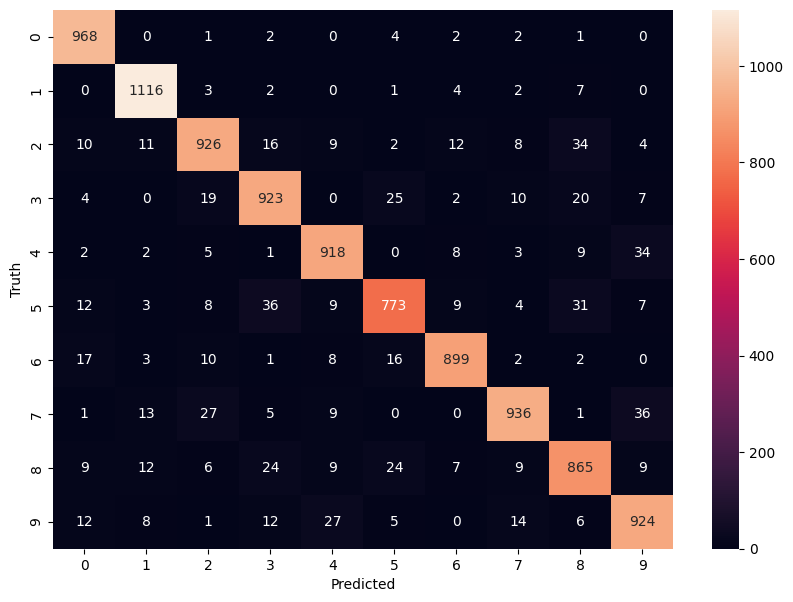

In [111]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

model.evaluate(x_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8668 - loss: 0.4704
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9622 - loss: 0.1328
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9749 - loss: 0.0864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9799 - loss: 0.0661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9839 - loss: 0.0515
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0904


[0.08037980645895004, 0.9754999876022339]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

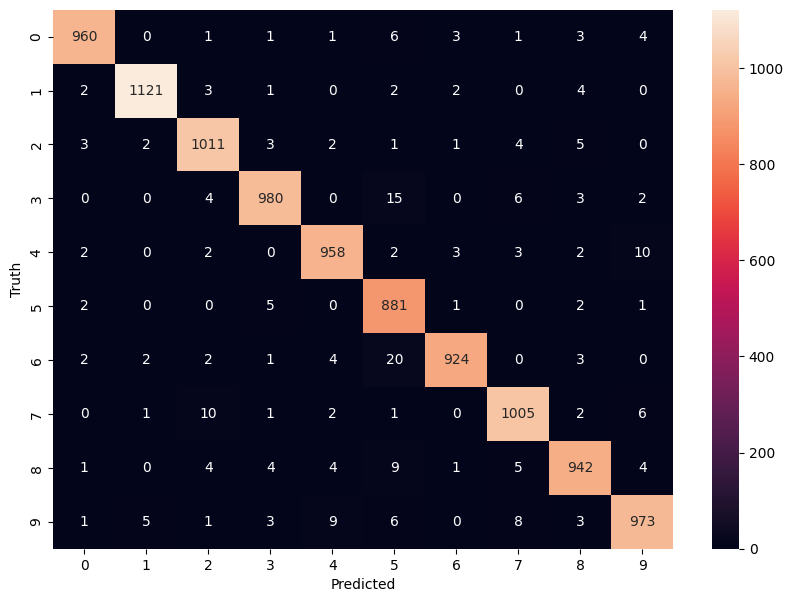

In [113]:
y_predict = model.predict(x_test_flattened)
cm = tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predict, axis=1))

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [114]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

y_predict = model.predict(x_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8672 - loss: 0.4654
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9601 - loss: 0.1357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9730 - loss: 0.0910
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9787 - loss: 0.0678
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9849 - loss: 0.0521
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9692 - loss: 0.1049
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


***TUTORIAL 8 =================================================***

In [115]:
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))

sigmoid(-56)

4.780892883885469e-25

In [116]:
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

tanh(-56)

-1.0

In [117]:
def relu(x):
  return max(0, x)

relu(-100)

0

In [118]:
def leaky_relu(x):
  return max(0.1*x, x)

leaky_relu(-100)

-10.0

***TUTORIAL 10 =================================================***

In [119]:
revenue = np.array([[180, 200, 220], [24, 36, 40], [12, 18, 20]])
expenses = np.array([[80, 90, 100], [10, 16, 20], [8, 10, 10]])

In [120]:
profit = revenue - expenses
print(profit)

[[100 110 120]
 [ 14  20  20]
 [  4   8  10]]


In [121]:
price_per_unit = np.array([1000, 400, 1200])
units = np.array([[30, 30, 50], [5, 10, 15], [2, 5, 7]])
sales = np.dot(price_per_unit,units)
print(sales)

[34400 40000 64400]


***TUTORIAL 11 =================================================***

In [122]:
y_predicted = np.array([1, 1, 0, 0, 1])
y_true = np.array([0.30, 0.70, 1, 0, 0.5])

In [123]:
def mae(y_predicted, y_true):
  return np.average(np.abs(y_predicted - y_true))

mae(y_predicted, y_true)


0.5

In [124]:
def log_loss(y_predicted, y_true):
    # Clip predicted values to avoid log(0)
    y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)

    # Correct log loss formula
    return -np.average(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))

log_loss(y_predicted, y_true)

17.2696280766844

In [125]:
def mse(y_predicted, y_true):
  return np.mean(np.power((y_predicted - y_true), 2))

mse(y_predicted, y_true)

0.366

***TUTORIAL 12 =================================================***

In [126]:
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/refs/heads/master/6_gradient_descent/insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [127]:
df['age'] = df['age'] /(df['age'].max())

In [128]:
df.head()

,age,affordibility,bought_insurance
0,0.354839,1,0
1,0.403226,0,0
2,0.758065,1,1
3,0.838710,0,0
4,0.741935,1,1


In [129]:
from sklearn.model_selection import train_test_split

# Splitting dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(df[['age', 'affordibility']], df.bought_insurance, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 22
Testing set size: 6


In [130]:
print(X_train)

         age  affordibility
17  0.935484              1
22  0.645161              1
11  0.451613              1
13  0.467742              0
15  0.887097              1
1   0.403226              0
4   0.741935              1
5   0.903226              1
2   0.758065              1
16  0.403226              0
23  0.725806              1
3   0.838710              0
26  0.370968              1
24  0.806452              1
18  0.306452              0
27  0.741935              1
20  0.338710              1
7   0.967742              0
10  0.290323              1
14  0.790323              1
19  0.290323              1
6   0.887097              0


In [131]:
model = keras.Sequential([
    keras.layers.Input(shape=(2,)),
    keras.layers.Dense(1, activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step - accuracy: 0.5000 - loss: 0.7806
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7801
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7795
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.7790
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.7784
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5000 - loss: 0.7779
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 0.7773
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5000 - loss: 0.7768
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7763
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.7757
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7752
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - 

In [132]:
y_predict = model.predict(X_test)
y_predict = np.round(y_predict, 2)
y_predict

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0.71],
       [0.69],
       [0.71],
       [0.47],
       [0.61],
       [0.47]], dtype=float32)

In [133]:
print(y_test)

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64


In [134]:
coef, intercept = model.get_weights()
print(coef)
print(intercept)

[[0.68153673]
 [0.627274  ]]
[-0.40538993]


In [135]:
def prediction_function(age, affordibility):
  weighted_sum =  age * coef[0] + affordibility * coef[1] + intercept
  return sigmoid(weighted_sum)


In [136]:
X_test

,age,affordibility
9,0.983871,1
25,0.870968,1
8,1.000000,1
21,0.419355,0
0,0.354839,1
12,0.435484,0


In [137]:
prediction_function(0.983, 1)

<ipython-input-115-1aa4ded09e79>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(-x))


0.709268627899353

In [138]:
def log_loss(y_predicted, y_true):
    # Clip predicted values to avoid log(0)
    y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)
    return np.average(
        -y_true * np.log(y_predicted) - (1 - y_true) * np.log(1 - y_predicted)
    )

In [139]:
def numpy_sigmoid(X):
  return 1/(1+np.exp(-X))

In [140]:
def gradient_descent(age, affordibility, y_true, epochs):
  w1 = w2 = 1
  bias = 0
  epochs = epochs
  rate = 0.5
  n = len(age)

  for i in range(1, epochs):
    y_p = age * w1 + affordibility * w2 + bias
    y_p_sigmoid = numpy_sigmoid(y_p)
    loss = log_loss(y_p_sigmoid, y_train)
    print(f'loss at epoch:{i} is {loss:2f}')
    print(f'w1 = {w1:2f}, w2 = {w2:2f}, bias = {bias:2f}')
    w1 = w1 - rate * (np.dot(age, np.transpose(y_p_sigmoid - y_true)))*(1/n)
    w2 = w2 - rate * (np.dot(affordibility, np.transpose(y_p_sigmoid - y_true)))*(1/n)
    bias = bias - rate * np.mean(y_p_sigmoid - y_true)
    epochs += 1

  return w1, w2, bias


In [141]:
print(X_train['age'].shape)
print(X_train['affordibility'].shape)
print(y_train.shape)

(22,)
(22,)
(22,)


In [142]:
gradient_descent(X_train['age'], X_train['affordibility'], y_train, 50)

loss at epoch:1 is 0.780631
w1 = 1.000000, w2 = 1.000000, bias = 0.000000
loss at epoch:2 is 0.727557
w1 = 0.943324, w2 = 0.919572, bias = -0.137722
loss at epoch:3 is 0.689616
w1 = 0.898493, w2 = 0.851892, bias = -0.256407
loss at epoch:4 is 0.663493
w1 = 0.864898, w2 = 0.796607, bias = -0.357168
loss at epoch:5 is 0.645963
w1 = 0.841406, w2 = 0.752669, bias = -0.441888
loss at epoch:6 is 0.634333
w1 = 0.826614, w2 = 0.718623, bias = -0.512842
loss at epoch:7 is 0.626581
w1 = 0.819060, w2 = 0.692880, bias = -0.572349
loss at epoch:8 is 0.621297
w1 = 0.817378, w2 = 0.673914, bias = -0.622557
loss at epoch:9 is 0.617550
w1 = 0.820374, w2 = 0.660369, bias = -0.665334
loss at epoch:10 is 0.614747
w1 = 0.827048, w2 = 0.651098, bias = -0.702235
loss at epoch:11 is 0.612520
w1 = 0.836582, w2 = 0.645158, bias = -0.734524
loss at epoch:12 is 0.610644
w1 = 0.848327, w2 = 0.641796, bias = -0.763207
loss at epoch:13 is 0.608981
w1 = 0.861769, w2 = 0.640415, bias = -0.789077
loss at epoch:14 is 0.

(1.5109570260949845, 0.7760497086503022, -1.3771108839746358)

***TUTORIAL 13 =================================================***

In [143]:
class myNN:
  def __init__(self):
    self.w1 = 1
    self.w2 = 1
    self.bias = 0

  def gradient_descent(self, age, affordibility, y_true, epochs):
    w1 = w2 = 1
    bias = 0
    epochs = epochs
    rate = 0.5
    n = len(age)

    for i in range(1, epochs):
      y_p = age * w1 + affordibility * w2 + bias
      y_p_sigmoid = numpy_sigmoid(y_p)
      loss = log_loss(y_p_sigmoid, y_train)
      if i%40 == 0:
        print(f'loss at epoch:{i} is {loss:2f}')
        print(f'w1 = {w1:2f}, w2 = {w2:2f}, bias = {bias:2f}')
      w1 = w1 - rate * (np.dot(age, np.transpose(y_p_sigmoid - y_true)))*(1/n)
      w2 = w2 - rate * (np.dot(affordibility, np.transpose(y_p_sigmoid - y_true)))*(1/n)
      bias = bias - rate * np.mean(y_p_sigmoid - y_true)
      epochs += 1

    return w1, w2, bias

  def fit(self, X, y, epochs):
    self.w1, self.w2, self.bias = self.gradient_descent(X['age'], X['affordibility'], y, epochs)

  def predict(self, X_test):
    weighted_sum =  self.w1 * X_test['age'] + self.w2 * X_test['affordibility'] + self.bias
    return numpy_sigmoid(weighted_sum)

In [144]:
Custom_model = myNN()
Custom_model.fit(X_train, y_train, 400)

loss at epoch:40 is 0.576203
w1 = 1.339116, w2 = 0.740447, bias = -1.237561
loss at epoch:80 is 0.540938
w1 = 1.988528, w2 = 0.862759, bias = -1.755454
loss at epoch:120 is 0.515902
w1 = 2.543731, w2 = 0.950109, bias = -2.185270
loss at epoch:160 is 0.497708
w1 = 3.018626, w2 = 1.020830, bias = -2.550405
loss at epoch:200 is 0.484223
w1 = 3.426809, w2 = 1.082462, bias = -2.865539
loss at epoch:240 is 0.474049
w1 = 3.779976, w2 = 1.138165, bias = -3.140653
loss at epoch:280 is 0.466249
w1 = 4.087696, w2 = 1.189332, bias = -3.382957
loss at epoch:320 is 0.460186
w1 = 4.357653, w2 = 1.236639, bias = -3.597884
loss at epoch:360 is 0.455412
w1 = 4.595994, w2 = 1.280480, bias = -3.789658


In [145]:
Custom_model.predict(X_test)

,0
9,0.889888
25,0.824451
8,0.897260
21,0.125042
0,0.281999
12,0.133775


***TUTORIAL 14 =================================================***